In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [114]:
#데이터 셋 불러오기
df = pd.read_csv('/content/vgames2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [115]:
#원본 데이터 복사

df_2 = df.copy()

In [116]:
#Sales feature 단위 통일 및 데이터 형태 결정
#vgchartz 사이트 참고 후 기본 단위가 m임을 확인

df_2.NA_Sales = df_2.NA_Sales.replace({'K':'*0.001', 'M':'*1'}, regex = True).map(pd.eval).astype('float')
df_2.EU_Sales = df_2.EU_Sales.replace({'K':'*0.001', 'M':'*1'}, regex = True).map(pd.eval).astype('float')
df_2.JP_Sales = df_2.JP_Sales.replace({'K':'*0.001', 'M':'*1'}, regex = True).map(pd.eval).astype('float')
df_2.Other_Sales = df_2.Other_Sales.replace({'K':'*0.001', 'M':'*1'}, regex = True).map(pd.eval).astype('float')

In [117]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [118]:
#결측치 제거 데이터 양에 비해 적으므로 분석에 영향이 크지 않을 것으로 판단.

df_2.drop(df_2[df_2.Year.isnull() | df_2.Genre.isnull() | df_2.Publisher.isnull()].index, axis=0, inplace =True)

In [119]:
df_2.describe()

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,8291.719845,1994.178437,0.265195,0.147378,0.078283,0.048234
std,4792.062774,155.484265,0.822431,0.508340,0.309272,0.189678
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4143.000000,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,8284.000000,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,12441.000000,2010.000000,0.240000,0.110000,0.040000,0.040000
max,16598.000000,2020.000000,41.490000,29.020000,10.220000,10.570000


In [120]:
#연도를 기준으로 데이터의 개수 파악

pd.DataFrame(df_2.Year.value_counts()).reset_index().sort_values('index', ascending = False)

,index,Year
60,2020.0,1
51,2017.0,3
17,2016.0,337
11,2015.0,606
12,2014.0,578
...,...,...
46,4.0,4
41,3.0,7
52,2.0,3
55,1.0,2


In [121]:
#연도 이상치 확인 및 수정
#https://www.vgchartz.com/game/32842/imagine-makeup-artist/

df_2[df_2.Year == 2020]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,6907,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02


In [122]:
df_2['Year'] = df_2.Year.astype('str')
df_2['Year'] = df_2.Year.str.replace('2020','2009')

In [123]:
#year feature 데이터 타입 정수로 설정

df_2.Year = pd.to_numeric(df_2.Year).astype('int')

In [124]:
#year feature 이상치 조정

df_2.loc[df_2.Year < 50,'Year'] += 2000
df_2.loc[df_2.Year< 100, 'Year'] += 1900

In [125]:
#필요 없는 column 제거

df_2 = df_2.iloc[:,1:]

In [126]:
#이름 순 정렬

df_2 = df_2.sort_values('Name').reset_index(drop=True)

In [127]:
 #게임 이름 중복값 확인

df_2.Name.duplicated().sum()

4946

In [128]:
df_2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16236,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
16237,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20
16238,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00
16239,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02


In [129]:
df_2.sort_values('Year', ascending = False)

# Year 순으로 정렬 했을 때 상위의 게임 3개가 2016년에 발매된 게임
# 데이터 셋에는 2017년이 마지막으로 업데이트 되어있음
# 2017년 상반기로 상황을 판단하고 이후 진행

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10093,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00
1507,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
10094,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
14780,Toukiden 2,PSV,2016,Action,Tecmo Koei,0.00,0.00,0.11,0.00
7137,Lego Star Wars: The Force Awakens,X360,2016,Action,Warner Bros. Interactive Entertainment,0.04,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...
8299,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03
6514,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01
4655,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
2821,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01


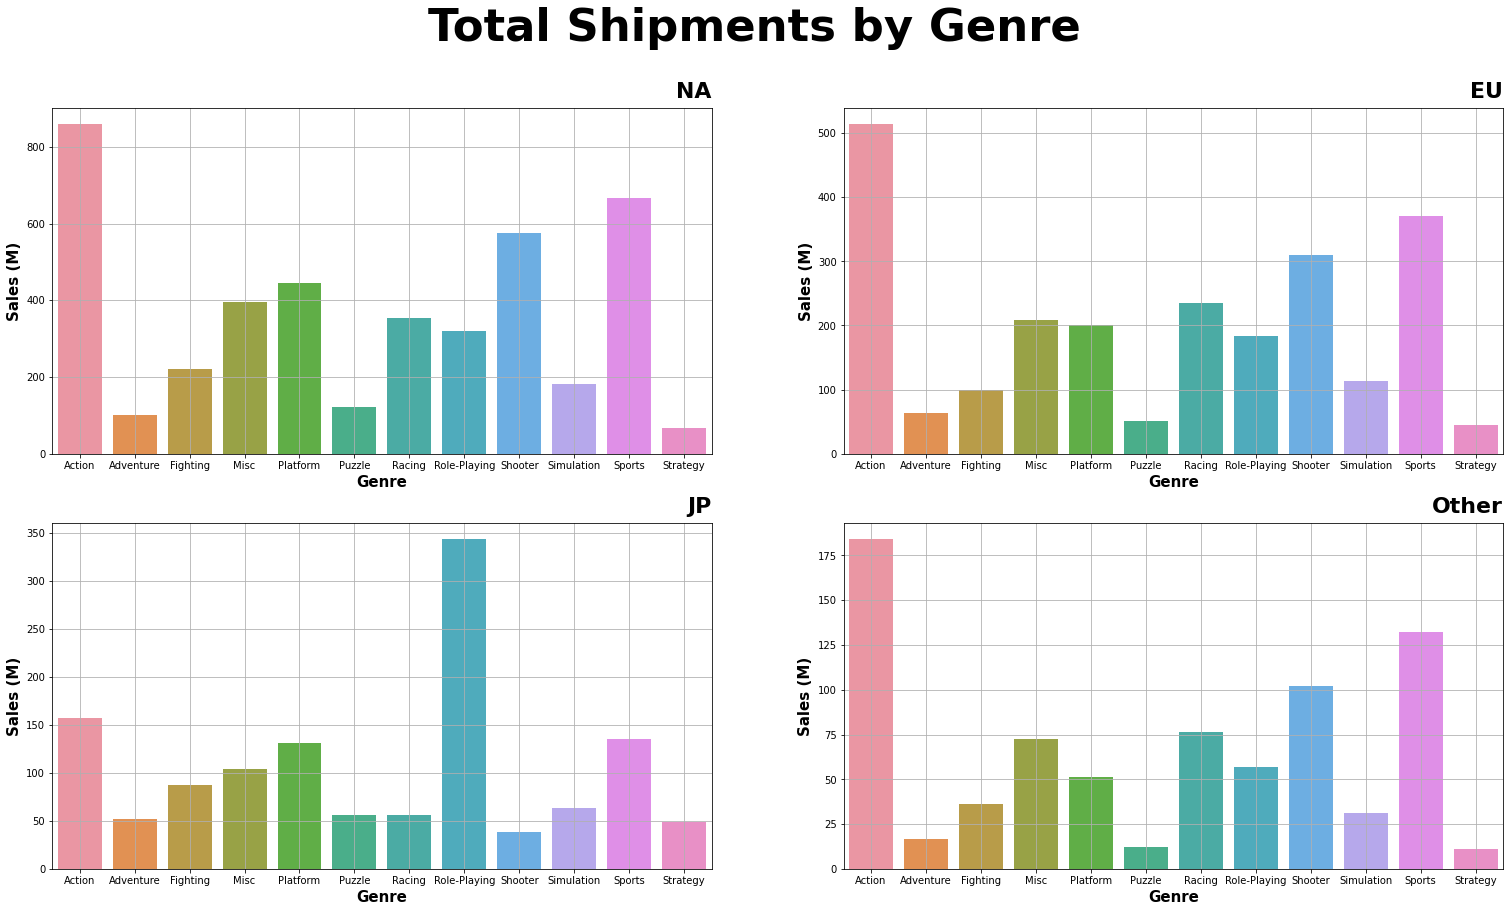

In [130]:
#g1 장르별 출고량 합계

g1 = pd.DataFrame(df_2.groupby('Genre').NA_Sales.sum()).reset_index()
g1['EU_Sales'] = pd.DataFrame(df_2.groupby('Genre').EU_Sales.sum()).reset_index()['EU_Sales']
g1['JP_Sales'] = pd.DataFrame(df_2.groupby('Genre').JP_Sales.sum()).reset_index()['JP_Sales']
g1['Other_Sales'] = pd.DataFrame(df_2.groupby('Genre').Other_Sales.sum()).reset_index()['Other_Sales']

#각 지역의 장르별 출고량 시각화
plt.figure(figsize=(26,14), facecolor = 'white')

title_font = {
    'fontsize': 22,
    'fontweight': 'bold'
}
suptitle_font = {
    'fontsize': 45,
    'fontweight': 'bold'
}
label_font ={
    'fontsize':15,
    'fontweight': 'bold'
}

plt.subplot(221)
sns.barplot(x=g1.Genre, y=g1.NA_Sales)
plt.title('NA', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.grid(True)

plt.subplot(222)
sns.barplot(x=g1.Genre, y=g1.EU_Sales)
plt.title('EU', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.grid(True)

plt.subplot(223)
sns.barplot(x=g1.Genre, y=g1.JP_Sales)
plt.title('JP', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.grid(True)

plt.subplot(224)
sns.barplot(x=g1.Genre, y=g1.Other_Sales)
plt.title('Other', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.grid(True)

plt.suptitle('Total Shipments by Genre', fontsize =45, fontweight= 'bold')
plt.show();


In [131]:
#d4 이름 중복되는 값 제거한 데이터

d4 = df_2.drop(df_2[df_2.Name.duplicated()].index).reset_index(drop=True)

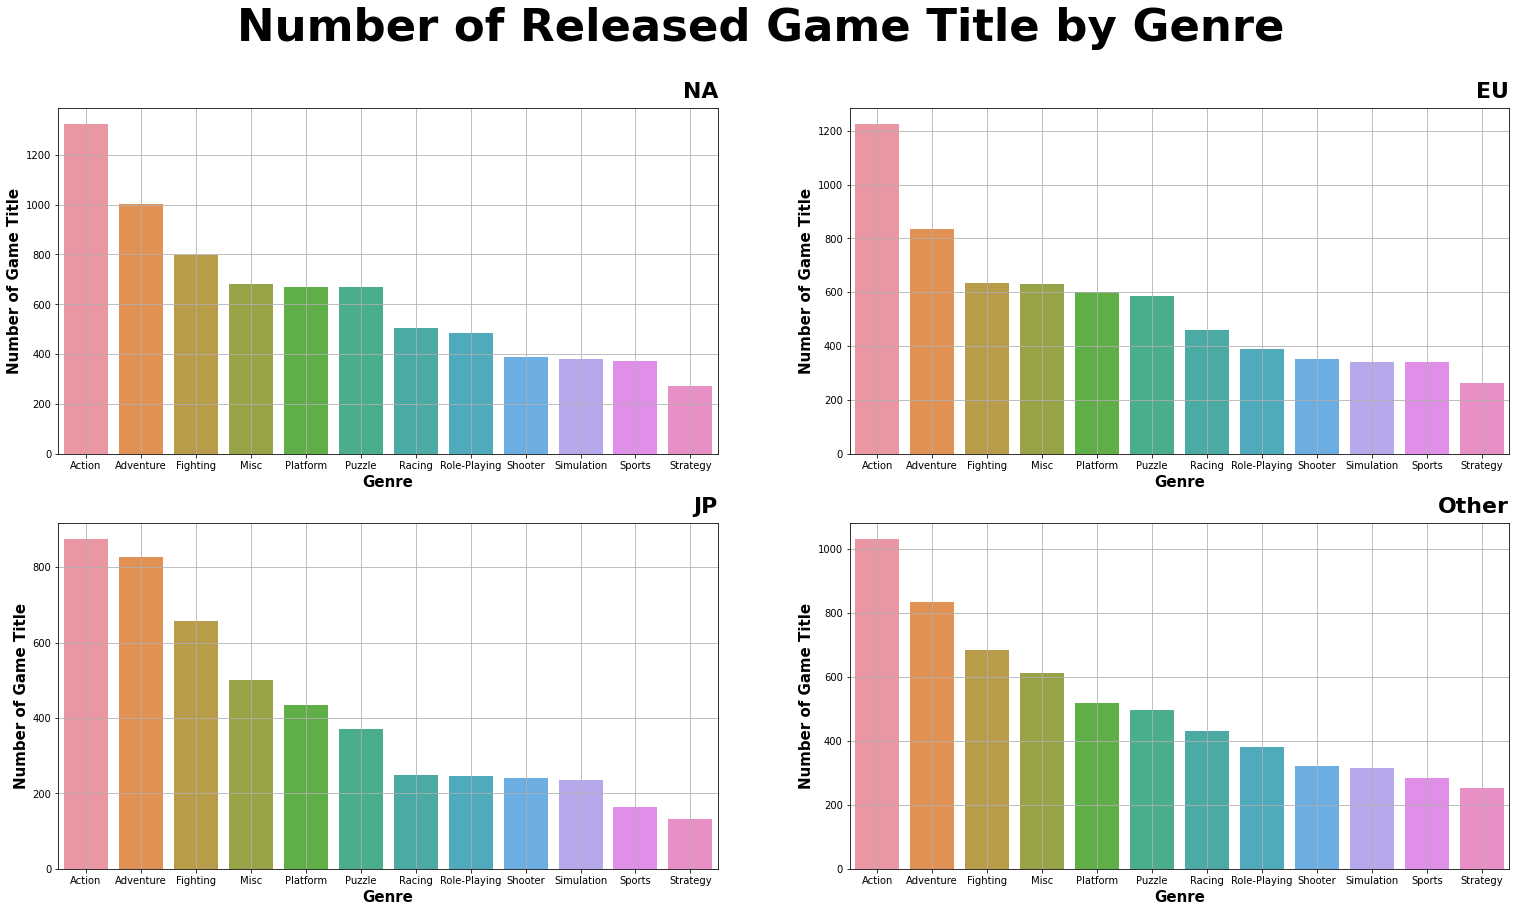

In [132]:
#각 지역에서 판매된 게임 중 장르별 출시된 게임 타이틀 수 시각화

g1['Number of Game Title - NA'] = pd.DataFrame(d4.query('NA_Sales != 0').value_counts('Genre')).reset_index()[0]
g1['Number of Game Title - EU'] = pd.DataFrame(d4.query('EU_Sales != 0').value_counts('Genre')).reset_index()[0]
g1['Number of Game Title - JP'] = pd.DataFrame(d4.query('JP_Sales != 0').value_counts('Genre')).reset_index()[0]
g1['Number of Game Title - Other'] = pd.DataFrame(d4.query('Other_Sales != 0').value_counts('Genre')).reset_index()[0]


plt.figure(figsize=(26,14), facecolor = 'white')

plt.subplot(221)
sns.barplot(x=g1.Genre, y=g1['Number of Game Title - NA'])
plt.title('NA', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Number of Game Title', fontdict = label_font)
plt.grid(True)

plt.subplot(222)
sns.barplot(x=g1.Genre, y=g1['Number of Game Title - EU'])
plt.title('EU', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Number of Game Title', fontdict = label_font)
plt.grid(True)

plt.subplot(223)
sns.barplot(x=g1.Genre, y=g1['Number of Game Title - JP'])
plt.title('JP', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Number of Game Title', fontdict = label_font)
plt.grid(True)

plt.subplot(224)
sns.barplot(x=g1.Genre, y=g1['Number of Game Title - Other'])
plt.title('Other', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Number of Game Title', fontdict = label_font)
plt.grid(True)

plt.suptitle('Number of Released Game Title by Genre', fontsize =45, fontweight= 'bold')
plt.show();

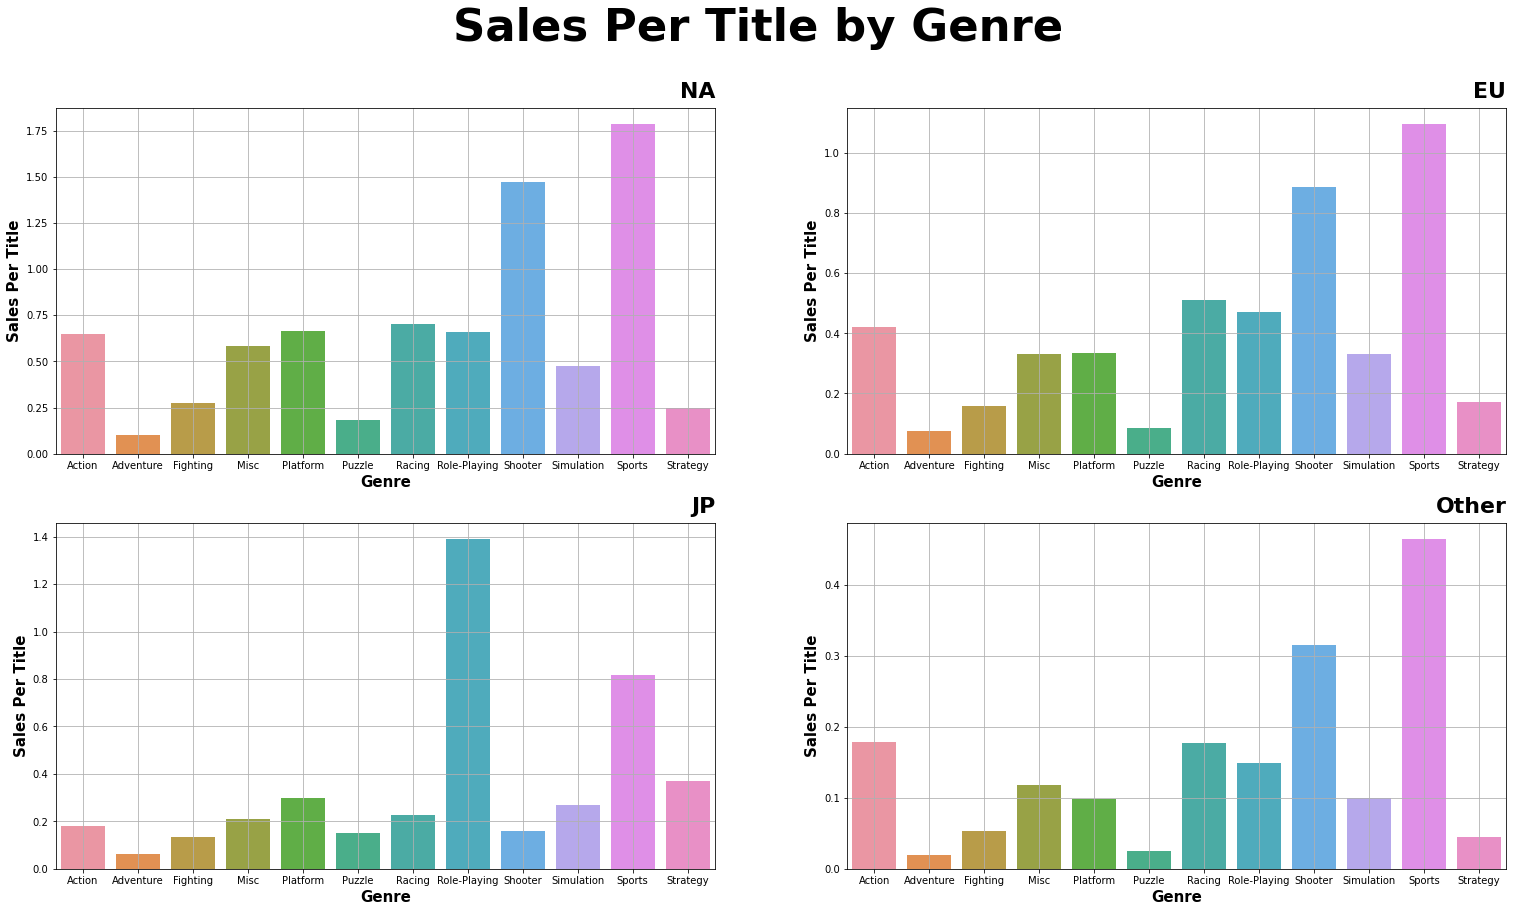

In [133]:
#각 지역별 게임의 평균 출고량 시각화

g1['Sales Per Title - NA'] = g1['NA_Sales']/g1['Number of Game Title - NA']
g1['Sales Per Title - EU'] = g1['EU_Sales']/g1['Number of Game Title - EU']
g1['Sales Per Title - JP'] = g1['JP_Sales']/g1['Number of Game Title - JP']
g1['Sales Per Title - Other'] = g1['Other_Sales']/g1['Number of Game Title - Other']
 

plt.figure(figsize=(26,14), facecolor = 'white')

plt.subplot(221)
sns.barplot(x=g1.Genre, y=g1['Sales Per Title - NA'])
plt.title('NA', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales Per Title', fontdict = label_font)
plt.grid(True)

plt.subplot(222)
sns.barplot(x=g1.Genre, y=g1['Sales Per Title - EU'])
plt.title('EU', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales Per Title', fontdict = label_font)
plt.grid(True)

plt.subplot(223)
sns.barplot(x=g1.Genre, y=g1['Sales Per Title - JP'])
plt.title('JP', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales Per Title', fontdict = label_font)
plt.grid(True)

plt.subplot(224)
sns.barplot(x=g1.Genre, y=g1['Sales Per Title - Other'])
plt.title('Other', fontdict = title_font , pad=10, loc='right')
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales Per Title', fontdict = label_font)
plt.grid(True)

plt.suptitle('Sales Per Title by Genre', fontsize =45, fontweight= 'bold')
plt.show();

In [134]:
#h1: tidy format으로 형태 변경

h1 = g1.rename(columns = {'NA_Sales':'NA', 'EU_Sales':'EU',	'JP_Sales':'JP',	'Other_Sales':'Other'})
h1 = h1.melt(id_vars= ['Genre'],
          value_vars =['NA',	'EU',	'JP',	'Other'],
          var_name = 'Region',
          value_name = 'Sales')
h2 = g1.rename(columns = {'Number of Game Title - NA':'NA', 'Number of Game Title - EU':'EU', 'Number of Game Title - JP':'JP', 'Number of Game Title - Other':'Other'})
h2 = h2.melt(id_vars= ['Genre'],
          value_vars =['NA',	'EU',	'JP',	'Other'],
          var_name = 'Region',
          value_name = 'Number of Title')
h3 = g1.rename(columns = {'Sales Per Title - NA':'NA', 'Sales Per Title - EU' :'EU', 'Sales Per Title - JP':'JP', 'Sales Per Title - Other':'Other'})
h3 = h3.melt(id_vars= ['Genre'],
          value_vars =['NA',	'EU',	'JP',	'Other'],
          var_name = 'Region',
          value_name = 'Sales Per Title')

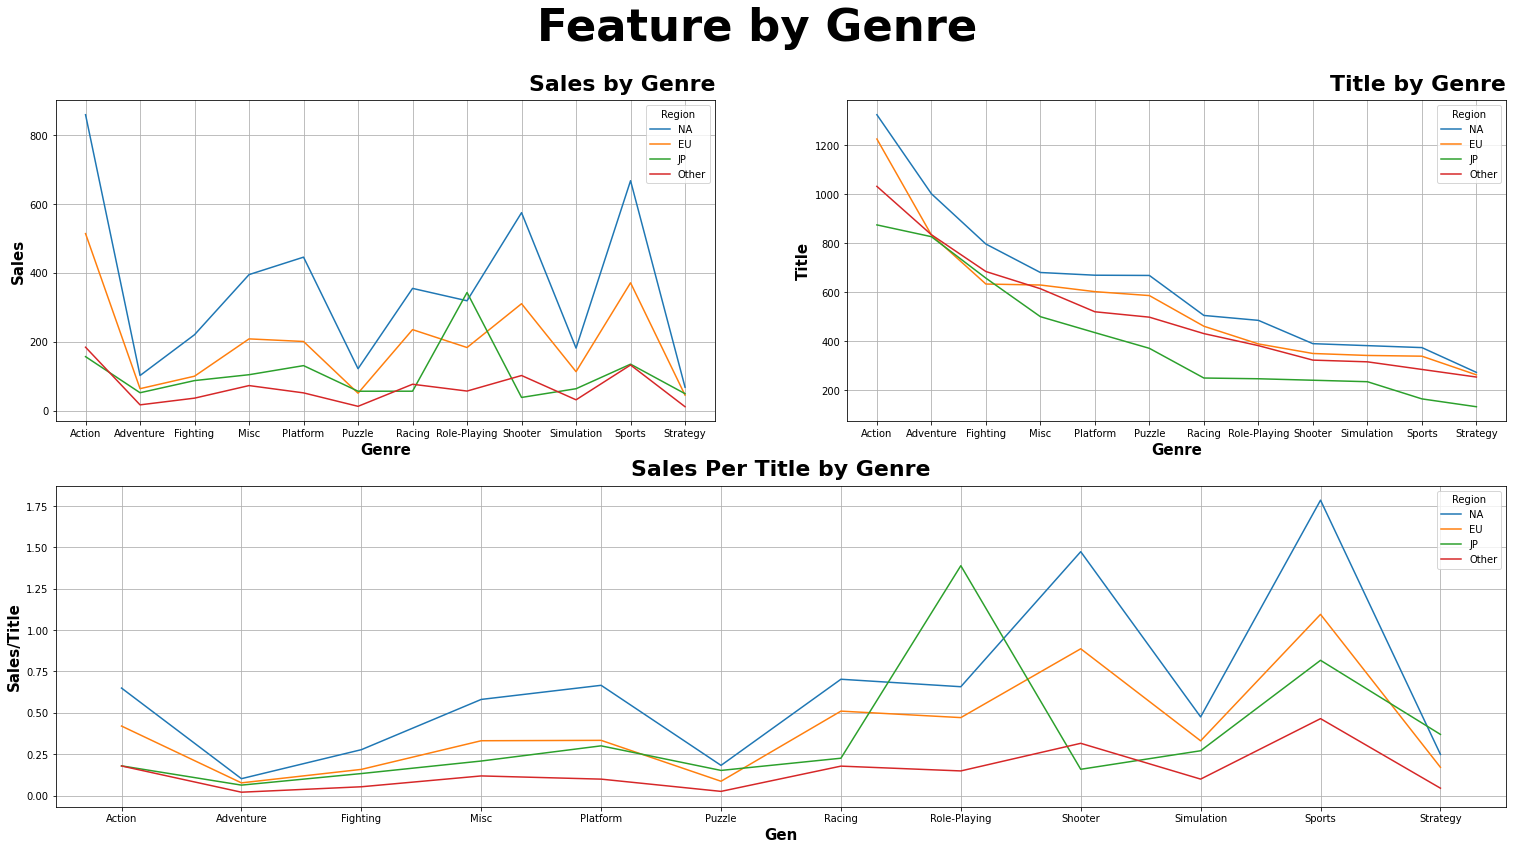

In [135]:
#위의 3가지 feature를 각 지역별로 한번에 보이도록 line graph plot

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(26,13),facecolor = 'white')

ax1 = fig.add_subplot(gs[0, 0])
sns.lineplot(x=h1.Genre, y=h1.Sales, hue = h1.Region)
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.title('Sales by Genre', fontdict = title_font , pad=10, loc='right')
plt.grid(True)


ax2 = fig.add_subplot(gs[0, 1])
sns.lineplot(x=h2.Genre, y=h2['Number of Title'], hue = h2.Region)
plt.xlabel('Genre', fontdict = label_font)
plt.ylabel('Title', fontdict = label_font)
plt.title('Title by Genre', fontdict = title_font , pad=10, loc='right')
plt.grid(True)


ax3 = fig.add_subplot(gs[1, :])
sns.lineplot(x=h3.Genre, y=h3['Sales Per Title'], hue = h3.Region)
plt.xlabel('Gen', fontdict = label_font)
plt.ylabel('Sales/Title', fontdict = label_font)
plt.title('Sales Per Title by Genre', fontdict = title_font , pad=10)
plt.grid(True)






plt.suptitle('Feature by Genre', fontsize =45, fontweight= 'bold')
plt.show();


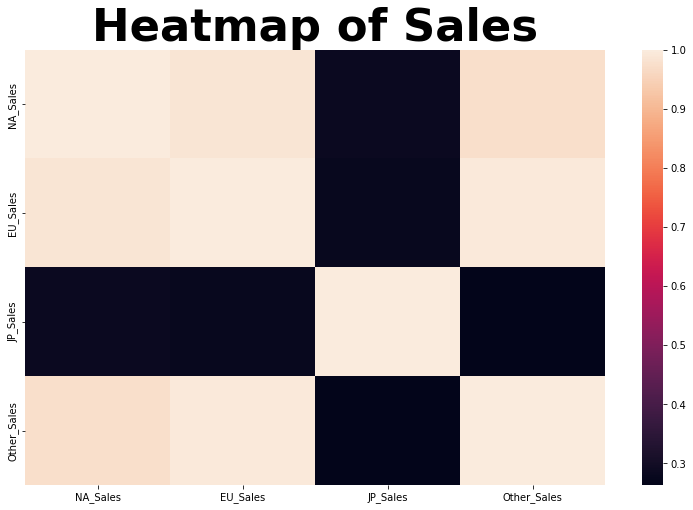

In [136]:
#상관 계수 계산 및 heatmap plot
corr1 = g1.iloc[:,0:5].corr()

fig = plt.figure(figsize=(13,8),facecolor = 'white')
ax = sns.heatmap(corr1)
plt.title('Heatmap of Sales', fontsize =45, fontweight= 'bold')
plt.show() 

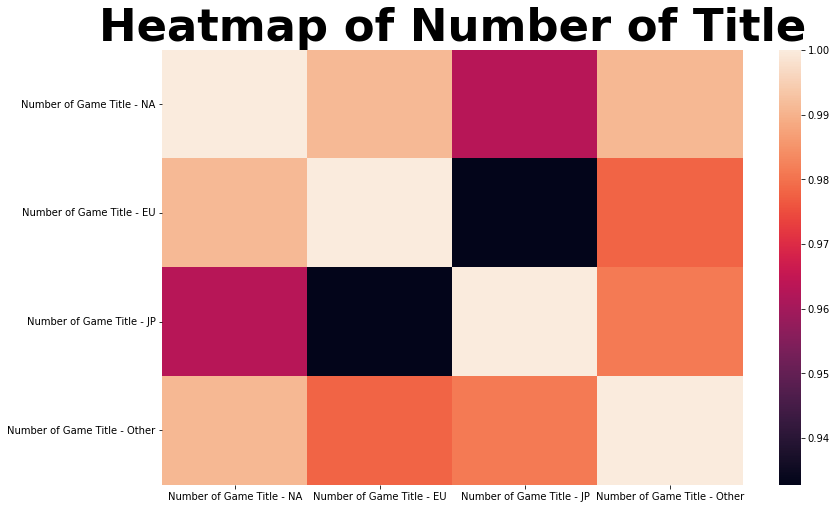

In [137]:
corr2 = g1.iloc[:,5:9].corr()

fig = plt.figure(figsize=(13,8), facecolor = 'white')
ax = sns.heatmap(corr2)
plt.title('Heatmap of Number of Title', fontsize =45, fontweight= 'bold')
plt.show() 

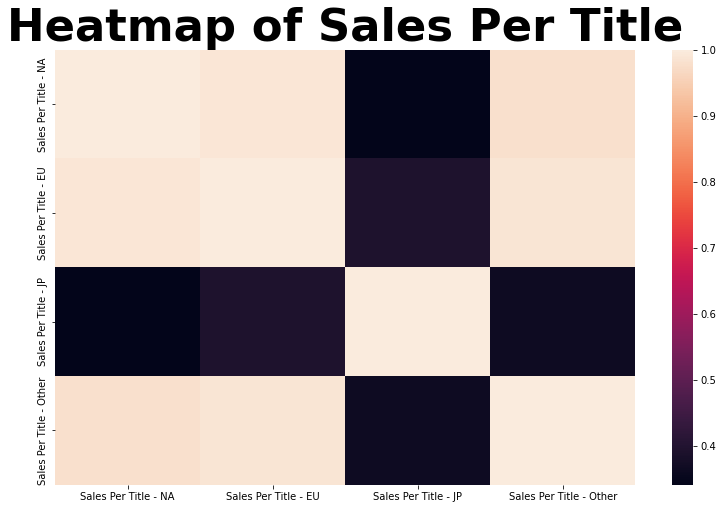

In [138]:
corr3 = g1.iloc[:,9:13].corr()

fig = plt.figure(figsize=(13,8),facecolor = 'white')
ax = sns.heatmap(corr3)
plt.title('Heatmap of Sales Per Title', fontsize =45, fontweight= 'bold')
plt.show() 

# **2 연도별 게임 트렌드 분석**

## **2-1 1) 연도별 전체 출고량 변화**

In [139]:
#전체 출고량 feature 생성

df_2['Total'] = df_2.NA_Sales + df_2.EU_Sales + df_2.JP_Sales + df_2.Other_Sales

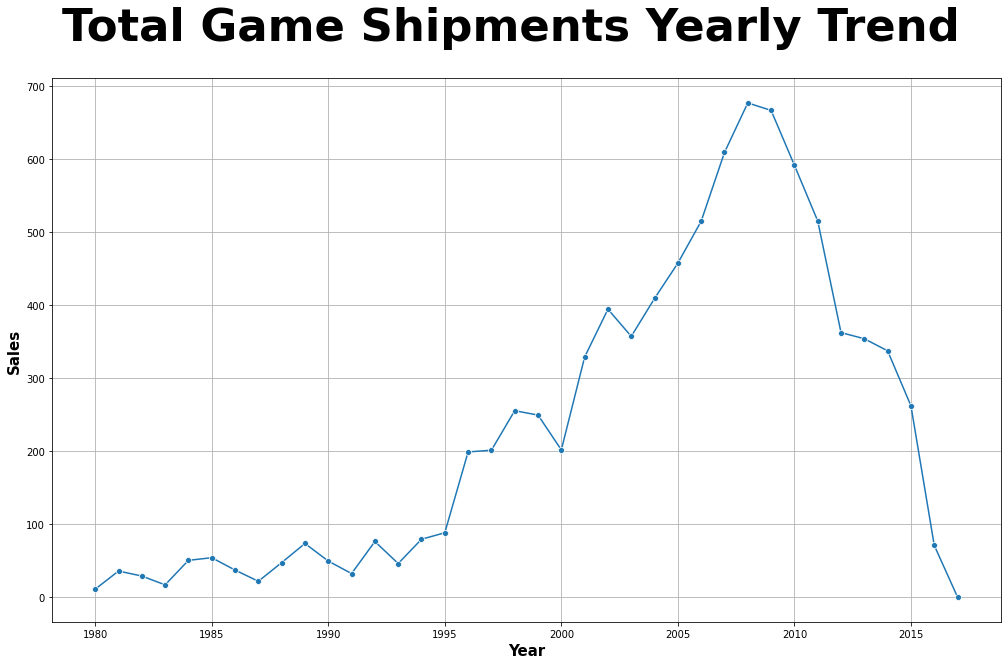

In [140]:
#t: 연도별 출고량 데이터
t = df_2.groupby('Year').sum().reset_index()

#연도별 출고량 plot
fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=t.Year, y=t.Total, marker = 'o')
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.grid(True)

plt.suptitle('Total Game Shipments Yearly Trend', fontsize =45, fontweight= 'bold')
plt.show();

In [141]:
#처음 출고량이 꺽인 해 2009년
t.sort_values('Total', ascending =False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
28,2008,350.89,183.57,60.26,81.69,676.41
29,2009,338.79,191.37,61.27,74.70,666.13
27,2007,310.64,160.14,60.29,77.53,608.60
30,2010,302.04,172.99,56.98,59.14,591.15
31,2011,240.37,167.17,52.98,54.33,514.85
26,2006,261.17,129.24,71.40,52.69,514.50
25,2005,240.92,121.55,54.16,40.49,457.12
24,2004,215.46,104.80,41.65,46.92,408.83
22,2002,215.56,109.50,41.76,27.25,394.07
32,2012,154.58,118.24,51.64,37.60,362.06


## **2-1 2) 연도별 지역 게임 출고량 변화**

In [142]:
#y1 지역별 게임 출고량 연간 트렌드

y1 = pd.DataFrame(df_2[df_2.NA_Sales !=0].reset_index(drop = True).groupby('Year').sum()['NA_Sales'])
y1['EU_Sales'] = pd.DataFrame(df_2[df_2.EU_Sales !=0].reset_index(drop = True).groupby('Year').sum()['EU_Sales'])
y1['JP_Sales'] = pd.DataFrame(df_2[df_2.JP_Sales !=0].reset_index(drop = True).groupby('Year').sum()['JP_Sales'])
y1['Other_Sales'] = pd.DataFrame(df_2[df_2.Other_Sales !=0].reset_index(drop = True).groupby('Year').sum()['Other_Sales'])
y1 = y1.reset_index()

In [143]:
#tidy format
y1 = y1.rename(columns = {'NA_Sales':'NA', 'EU_Sales':'EU',	'JP_Sales':'JP',	'Other_Sales':'Other'})
y1 = y1.melt(id_vars= ['Year'],
          value_vars =['NA',	'EU',	'JP',	'Other'],
          var_name = 'Region',
          value_name = 'Sales')

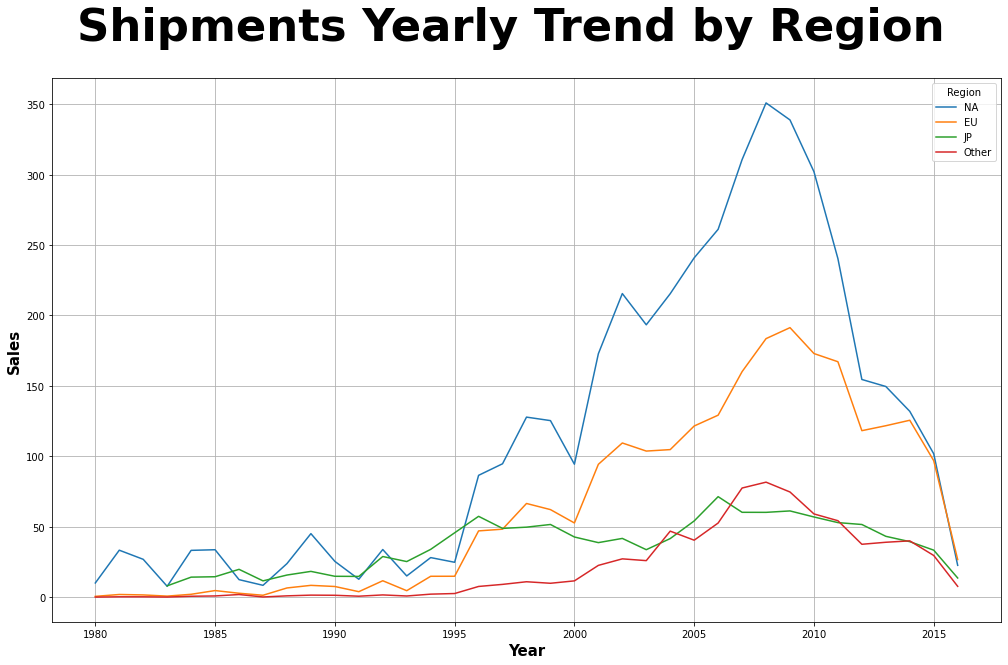

In [144]:
#지역별 게임 출고량 연간 트렌드 plot
fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=y1.Year, y=y1.Sales, hue = y1.Region)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.grid(True)

plt.suptitle('Shipments Yearly Trend by Region', fontsize =45, fontweight= 'bold')
plt.show();

##**2-2 1)플랫폼 중복을 제외한 연도별 출시 게임수**

In [145]:
t['sum'] = d4.groupby('Year').size().reset_index()[0]

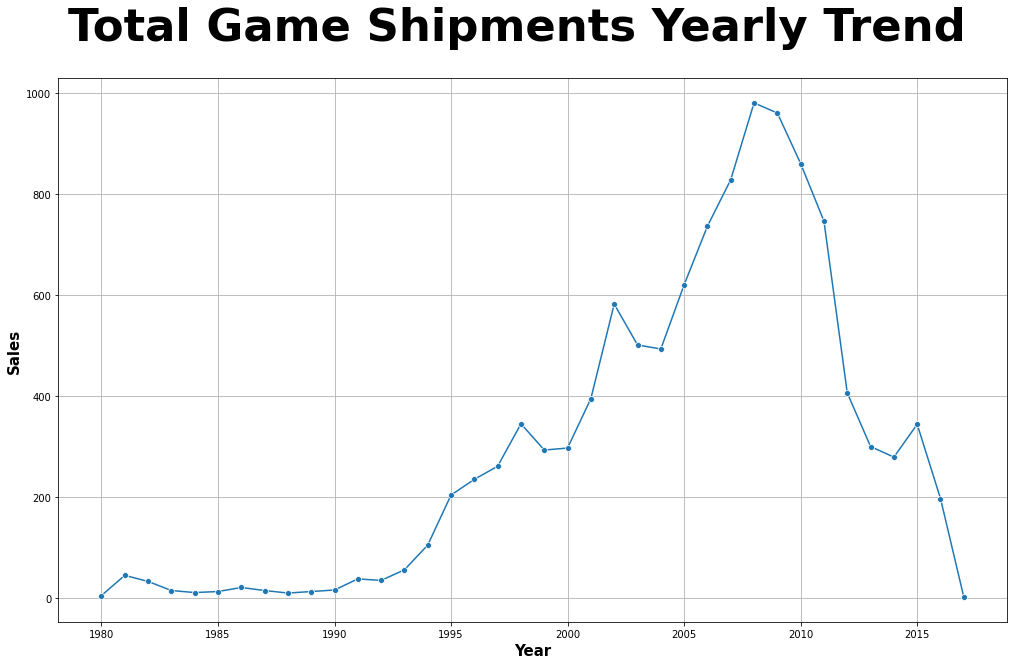

In [146]:
#지역별 게임 출고량 연간 트렌드 plot
fig = plt.figure(figsize=(17, 10),facecolor = 'white')

sns.lineplot(x=t.Year, y=t['sum'], marker = 'o')
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.grid(True)

plt.suptitle('Total Game Shipments Yearly Trend', fontsize =45, fontweight= 'bold')
plt.show();

## **2-3 연도별 게임당 평균 출고량**

### **2-3 1)중복 제거**

In [147]:
t['mean'] = t['Total']/t['sum']

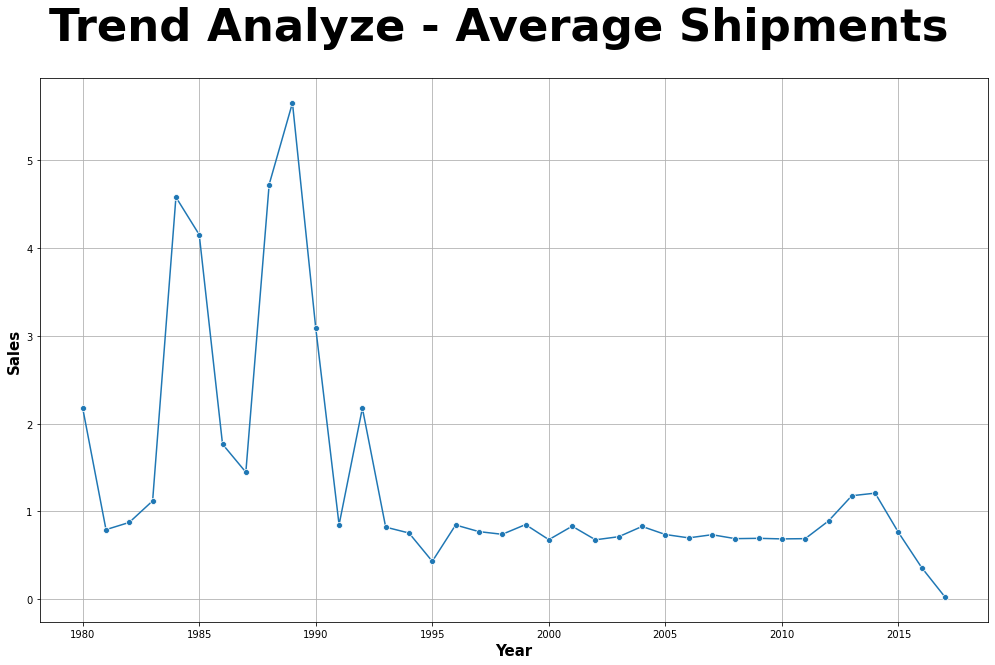

In [148]:
fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=t.Year, y=t['mean'], marker = 'o')
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.grid(True)

plt.suptitle('Trend Analyze - Average Shipments', fontsize =45, fontweight= 'bold')
plt.show();

###**2-3 2)중복 포함**

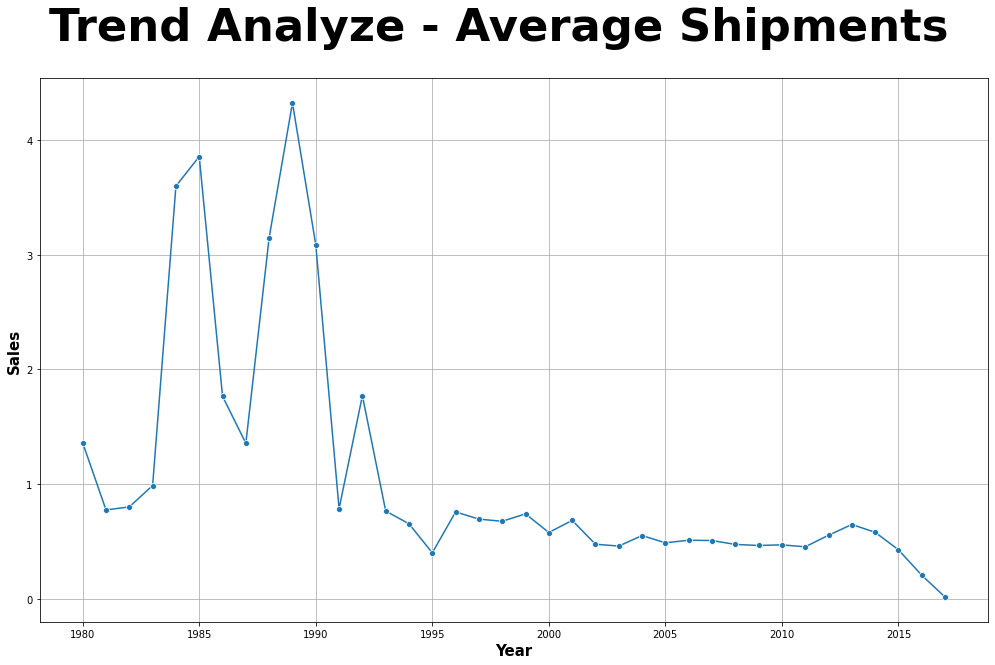

In [149]:
t['sumd'] = df_2.groupby('Year').size().reset_index()[0]
t['meand'] = t['Total']/t['sumd']

fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=t.Year, y=t['meand'], marker = 'o')
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Sales', fontdict = label_font)
plt.grid(True)

plt.suptitle('Trend Analyze - Average Shipments', fontsize =45, fontweight= 'bold')
plt.show()

## **2-4 연도별 출시된 게임 장르**

### **2-4 1)중복 포함 장르별 출시 게임 title**

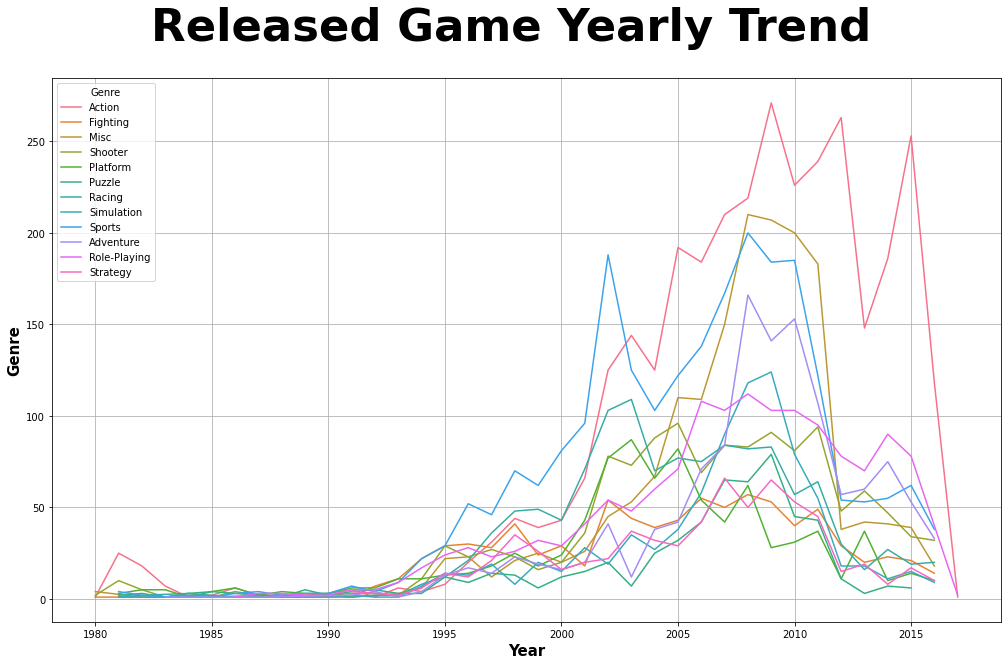

In [150]:
#플랫폼 중복 포함한 장르별 출시한 게임 연간 트렌드

y2 = pd.DataFrame(df_2.groupby(['Year','Genre']).size()).reset_index()

fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=y2.Year, y=y2[0], hue = y2.Genre)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Genre', fontdict = label_font)
plt.grid(True)

plt.suptitle('Released Game Yearly Trend', fontsize =45, fontweight= 'bold')
plt.show();



### **2-4 2) 중복제거 장르별 출시 게임 title**

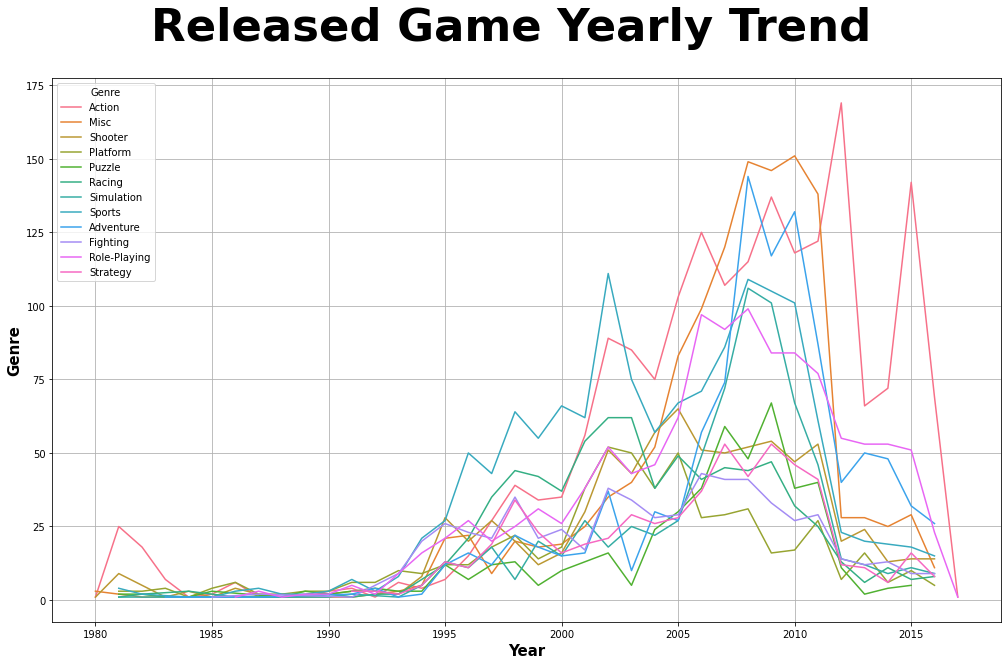

In [151]:
#플랫폼 중복 제거한 장르별 출시한 게임 연간 트렌드

y3 = d4.groupby(['Year', 'Genre']).size().reset_index()


fig = plt.figure(figsize=(17,10),facecolor = 'white')

sns.lineplot(x=y3.Year, y=y3[0], hue = y3.Genre)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Genre', fontdict = label_font)
plt.grid(True)

plt.suptitle('Released Game Yearly Trend', fontsize =45, fontweight= 'bold')
plt.show();

In [152]:
#t2 연도-장르별 출고량 합계

t2 = df_2.groupby(['Year', 'Genre'])['Total'].sum().reset_index()

#연도별 가장 많이 출고된 장르 데이터
m = df_2.groupby(['Year', 'Genre'])['Total'].sum().reset_index()
b = m.groupby(['Year'])['Total'].transform(max) == m['Total']
m = m[b].reset_index(drop = True)


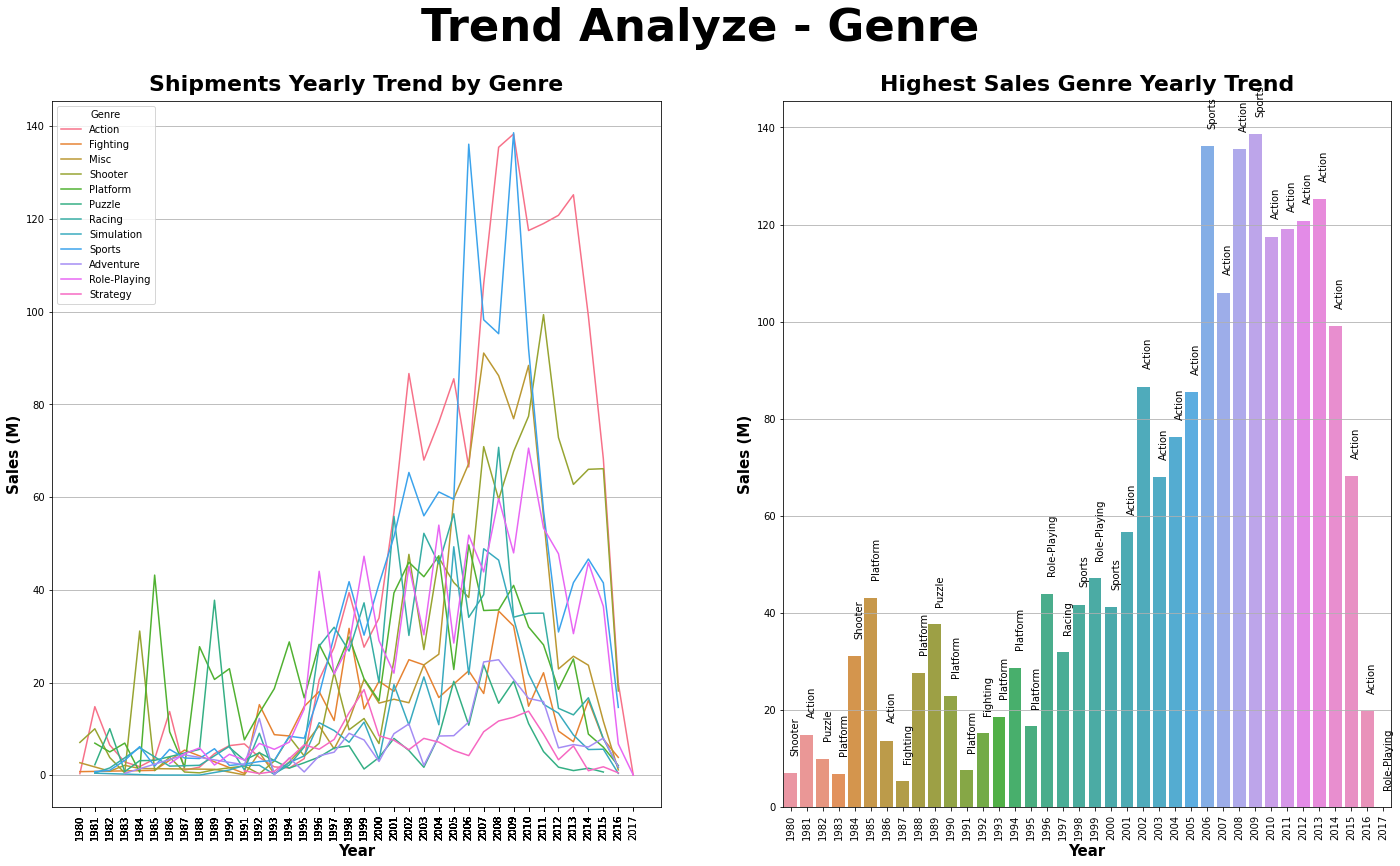

In [153]:
#figure 설정
gs = gridspec.GridSpec(1,2)
fig = plt.figure(figsize=(24,13),facecolor = 'white')

#line plot
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(x=t2.Year, y=t2['Total'], hue = t2.Genre)

plt.xticks(t2.Year, rotation=90)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.xlabel('Year', fontdict = label_font)
plt.grid(True, axis= 'y')
plt.title('Shipments Yearly Trend by Genre', fontdict = title_font , pad=10)




#bar plot
ax2 = fig.add_subplot(gs[0,1])

genre = m['Genre'].values
gm = sns.barplot(x='Year', y='Total', data= m)
cnt = 0
for value in m['Total']:
    gm.text(x=cnt, y=value + 4, s=str(genre[cnt]),
            color='black', size=10, rotation=90)
    cnt+=1

plt.xticks(rotation=90)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.xlabel('Year', fontdict = label_font)
plt.grid(True, axis= 'y')

plt.title('Highest Sales Genre Yearly Trend', fontdict = title_font , pad=10)

plt.suptitle('Trend Analyze - Genre', fontsize =45, fontweight= 'bold')
plt.show();

In [154]:
#t2 연도-장르별 평균 출고량량

t2['Released'] = y2[0]
t2['Mean'] = t2['Total']/t2['Released']


b1 = t2.groupby(['Year'])['Mean'].transform(max) == t2['Mean']
m1 = t2[b1].reset_index(drop = True)


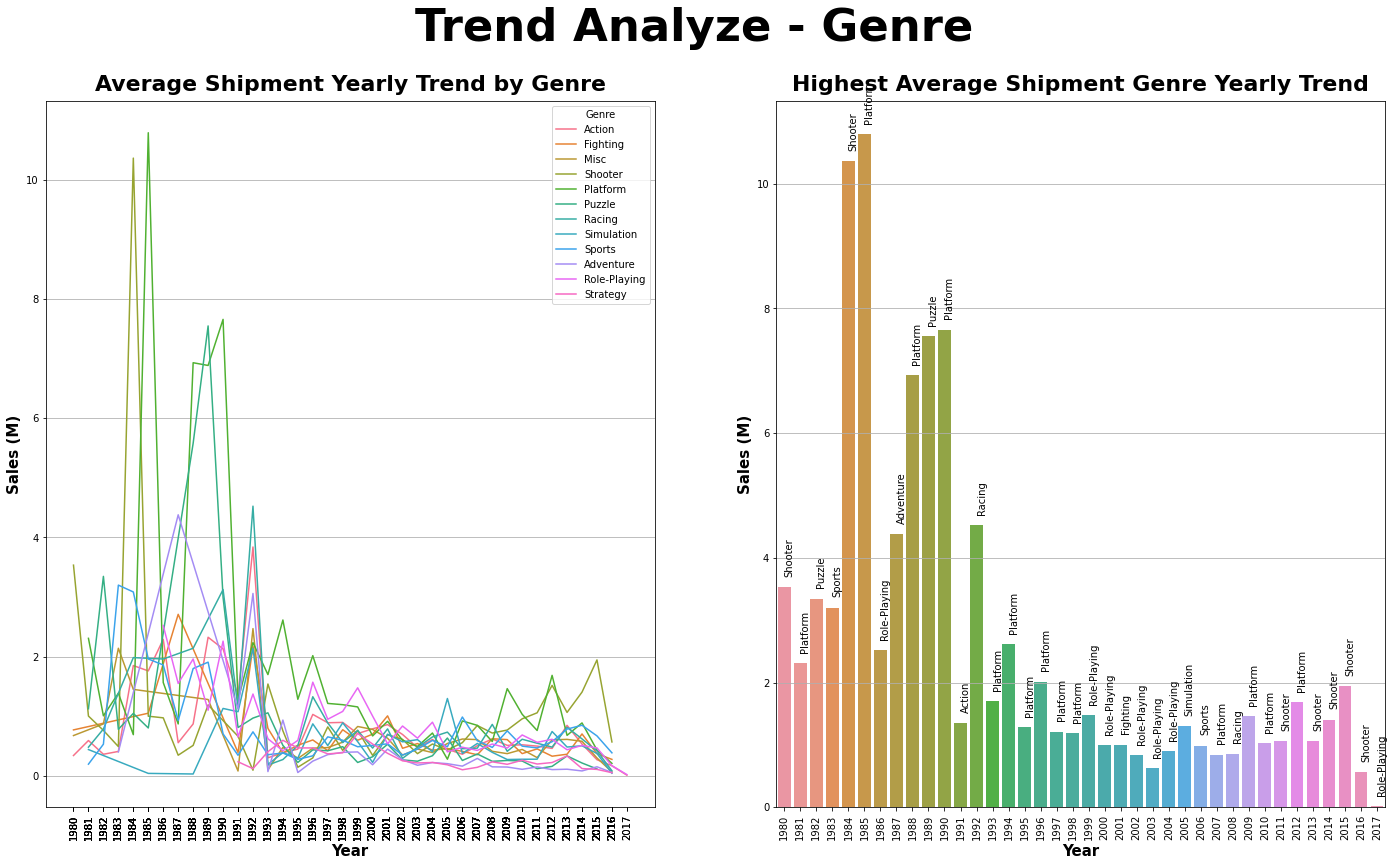

In [155]:
gs = gridspec.GridSpec(1,2)
fig = plt.figure(figsize=(24,13),facecolor = 'white')

#line plot
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(x=t2.Year, y=t2['Mean'], hue = t2.Genre)

plt.xticks(t2.Year, rotation=90)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.xlabel('Year', fontdict = label_font)
plt.grid(True, axis= 'y')

plt.title('Average Shipment Yearly Trend by Genre',fontdict = title_font , pad=10)




#bar plot
ax2 = fig.add_subplot(gs[0,1])

genre = m1['Genre'].values
gm1 = sns.barplot(x='Year', y='Mean', data= m1)
cnt = 0
for value in m1['Mean']:
    gm1.text(x=cnt, y=value + 0.2, s=str(genre[cnt]),
            color='black', size=10, rotation=90)
    cnt+=1

plt.xticks(rotation=90)
plt.ylabel('Sales (M)', fontdict = label_font)
plt.xlabel('Year', fontdict = label_font)
plt.grid(True, axis= 'y')

plt.title('Highest Average Shipment Genre Yearly Trend',fontdict = title_font , pad=10)

plt.suptitle('Trend Analyze - Genre', fontsize =45, fontweight= 'bold')
plt.show();

## **2-5 플랫폼 트렌드**

In [156]:
y4 = df_2.groupby(['Year', 'Platform']).size().reset_index()

y4.loc[y4.query('Platform == "Wii" | Platform == "SNES" | Platform == "N64" | Platform == "NES"').index, 'Platform'] = 'Console'
y4.loc[y4.query('Platform == "WiiU" | Platform == "3DS" | Platform == "DS"').index, 'Platform'] = 'Protable'
y4.loc[y4.query('Platform == "PS3" | Platform == "PS" | Platform == "PS4" | Platform == "PS2"').index, 'Platform'] = 'Console'
y4.loc[y4.query('Platform == "PSP" | Platform == "PSV"').index, 'Platform'] = 'Portable'
y4.loc[y4.query('Platform == "GBA" | Platform == "GG" | Platform == "WS" | Platform == "GB"').index, 'Platform'] = 'Portable'
y4.loc[y4.query('Platform == "GC" | Platform == "2600" | Platform == "3DO" | Platform == "PCFX" | Platform == "SCD" | Platform == "TG16" | Platform == "GEN"').index, 'Platform'] = 'Console'
y4.loc[y4.query('Platform == "XB" | Platform == "X360" | Platform == "XOne"').index, 'Platform'] = 'Console'
y4.drop(y4.query('Platform == "DC" | Platform == "SAT" | Platform == "NG"').index, inplace= True)
y4 = y4.groupby(['Year','Platform']).sum()
y4.reset_index(inplace=True)

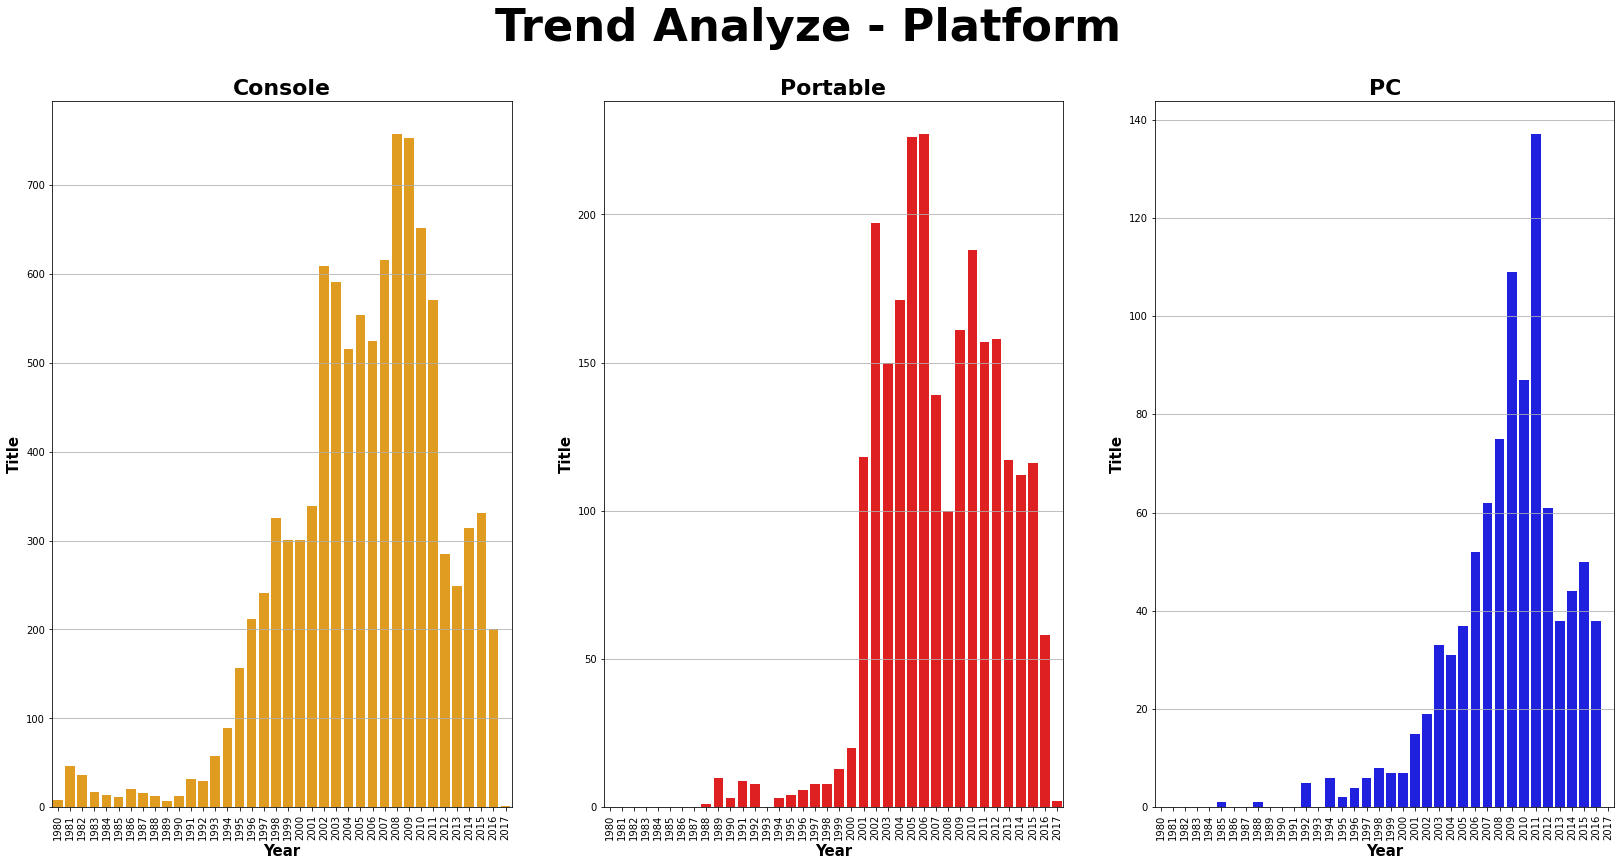

In [157]:
gs = gridspec.GridSpec(1,3)
fig = plt.figure(figsize=(28,13),facecolor = 'white')

ax1 = fig.add_subplot(gs[0,0])
sns.barplot(x=y4.Year, y=y4[y4.Platform== 'Console'][0], color = 'orange')
plt.xticks(rotation=90)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Title', fontdict = label_font)
plt.grid(True, axis = 'y')
plt.title('Console', fontdict = title_font)

ax1 = fig.add_subplot(gs[0,1])
sns.barplot(x=y4.Year, y=y4[y4.Platform== 'Portable'][0], color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Title', fontdict = label_font)
plt.grid(True, axis = 'y')
plt.title('Portable', fontdict = title_font)

ax1 = fig.add_subplot(gs[0,2])
sns.barplot(x=y4.Year, y=y4[y4.Platform== 'PC'][0], color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Year', fontdict = label_font)
plt.ylabel('Title', fontdict = label_font)
plt.grid(True, axis = 'y')
plt.title('PC', fontdict = title_font)

plt.suptitle('Trend Analyze - Platform', fontsize =45, fontweight= 'bold')
plt.show();

In [158]:
df_2.sort_values('Total', ascending =False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
15592,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
13091,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
7767,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
15594,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10290,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
13595,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9504,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
15590,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9507,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3609,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
